In [2]:
import Pkg; Pkg.activate(".")

  Activating new project at `~/SAFT_ML/WinterParameters`


In [3]:
using CSV, DataFrames, Plots, MolecularGraph, Graphs 

In [50]:
data = CSV.read("PC-SAFT-Parameter.csv",DataFrame,header=2) ;
molecular_weights = [standard_weight(smilestomol(x),3) for x in data.SMILES0] ;
name_strings = [string(a) for a in data.names] ;
data.MolecularWeight = molecular_weights ;
data.names = name_strings ;

# data

In [54]:
# Sort by a functional group
filtered_data_ketones = filter(row -> occursin("C(=O)C", row.SMILES0), data) ;
filtered_data_alcohols = filter(row -> occursin("CO", row.SMILES0), data) ;
filtered_data_amines = filter(row -> occursin("CN", row.SMILES0), data) ;
filtered_data_aromatics = filter(row -> occursin("c1ccccc1", row.SMILES0), data) ;

Row,names,SMILES0,m,sigma,epsilon_k,mu,kappa_ab,epsilon_k_ab,MolecularWeight
,String,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,benzene,c1ccccc1,2.89182,3.44706,262.203,0.0,0.0,0.0,78.114
2,toluene,Cc1ccccc1,3.14585,3.57221,267.883,0.0,0.0,0.0,92.141
3,aniline,Nc1ccccc1,3.52838,3.35795,304.764,0.0,0.00312848,1788.34,93.129
4,phenol,Oc1ccccc1,3.4734,3.36354,303.217,0.0,0.00362067,2140.27,94.113
5,fluorobenzene,Fc1ccccc1,2.95074,3.51551,257.152,2.2171,0.0,0.0,96.104
6,ethynylbenzene,C#Cc1ccccc1,3.59883,3.51006,268.973,0.0,0.0,0.0,102.136
7,benzonitrile,N#Cc1ccccc1,3.92054,3.33636,283.75,3.11085,0.0,0.0,103.124
8,isocyanobenzene,[C-]#[N+]c1ccccc1,3.9651,3.30336,275.782,2.57967,0.0,0.0,103.124
9,styrene,C=Cc1ccccc1,3.48222,3.61718,274.293,0.0,0.0,0.0,104.152


In [53]:
# Sort by a specific molecule name or group
filtered_data_specific = filter(row -> occursin("butane", row.names), data) ;
filtered_data_specific = sort(filtered_data_specific, :MolecularWeight) 


Row,names,SMILES0,m,sigma,epsilon_k,mu,kappa_ab,epsilon_k_ab,MolecularWeight
,String,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,cyclobutane,C1CCC1,2.3705,3.64854,233.855,0.0,0.0,0.0,56.108
2,butane,CCCC,2.3058,3.72772,225.057,0.0,0.0,0.0,58.124
3,methylidenecyclobutane,C=C1CCC1,2.65992,3.60106,241.913,0.0,0.0,0.0,68.119
4,butanenitrile,CCCC#N,3.19483,3.37367,264.129,2.89682,0.0,0.0,69.107
5,methylcyclobutane,CC1CCC1,2.54551,3.74925,242.653,0.0,0.0,0.0,70.135
6,2-methylbutane,CCC(C)C,2.55456,3.84602,231.482,0.0,0.0,0.0,72.151
7,1-deuteriooxybutane,[2H]OCCCC,3.36171,3.00457,278.127,0.0,0.00356902,1620.64,75.129
8,2-fluorobutane,CCC(C)F,2.58192,3.56867,225.149,1.99524,0.0,0.0,76.114
9,bicyclo[1.1.0]butane-1-carbonitrile,N#CC12CC1C2,3.60882,3.32093,270.487,2.84487,0.0,0.0,79.102


In [97]:
# m	sigma	epsilon_k	mu	kappa_ab	epsilon_k_ab

parameter = "epsilon_k_ab"

scatter(filtered_data_amines.MolecularWeight, filtered_data_amines[!, parameter], label="Amines",dpi=400)
scatter!(filtered_data_ketones.MolecularWeight, filtered_data_ketones[!, parameter], label="Ketones")
scatter!(filtered_data_alcohols.MolecularWeight, filtered_data_alcohols[!, parameter], label="Alcohols")
scatter!(filtered_data_aromatics.MolecularWeight, filtered_data_aromatics[!, parameter], label="Aromatics")
xlabel!("Molecular Weight [g/mol]")
ylabel!(parameter)
savefig("$parameter.png")

"/home/mgadaloff/SAFT_ML/WinterParameters/epsilon_k_ab.png"

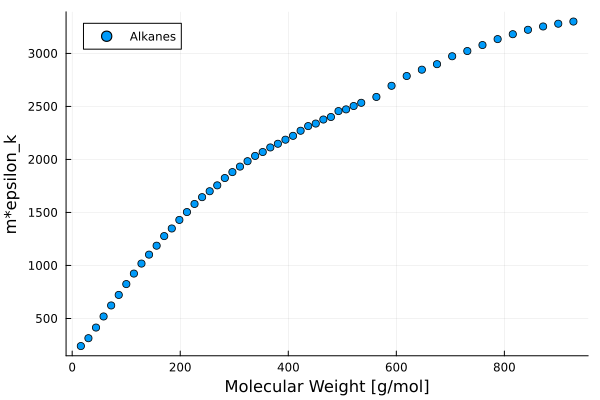

In [96]:
contains_only_c(name) = all(letter -> lowercase(letter) == 'c', name) ;
filtered_data_alkanes = filter(row -> contains_only_c(row.SMILES0), data) ;

filtered_data_alkanes = sort(filtered_data_alkanes, :MolecularWeight) ;

#scatter(filtered_data_alkanes.MolecularWeight, filtered_data_alkanes.m, label="Alkanes")

m_sigmacubed = []
for (a, b) in zip(filtered_data_alkanes.m, filtered_data_alkanes.sigma)
    push!(m_sigmacubed, a*b^3)
end

m_epsilon = []
for (a, b) in zip(filtered_data_alkanes.m, filtered_data_alkanes.epsilon_k)
    push!(m_epsilon, a*b)
end

scatter(filtered_data_alkanes.MolecularWeight, mepsilon, label="Alkanes")
xlabel!("Molecular Weight [g/mol]")
ylabel!("m*epsilon_k")


# sigmacubed lambda epsilon

In [95]:
println(filtered_data_alkanes)


52×9 DataFrame
 Row │ names              SMILES0                            m        sigma    epsilon_k  mu        kappa_ab     epsilon_k_ab  MolecularWeight 
     │ String?            String                             Float64  Float64  Float64    Float64   Float64      Float64       Float64         
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ methane            C                                  1.5181   3.2367     157.952  0.201893  0.0                0.0              16.043
   2 │ ethane             CC                                 1.7177   3.46452    182.78   0.0       0.0                0.0              30.07
   3 │ propane            CCC                                1.97913  3.64257    209.325  0.0       0.0                0.0              44.097
   4 │ butane             CCCC                               2.3058   3.72772    225.057  0.0       0.0                0.0   

In [98]:
contains_only_c(name) = all(letter -> (lowercase(letter) == 'c') && ('='), name) ;
filtered_data_alkanes = filter(row -> contains_only_c(row.SMILES0), data) ;


LoadError: TypeError: non-boolean (Char) used in boolean context